<font color = green >

### Import necessary packages
</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

<font color = green >

### Set interactive backend 
</font>

In [2]:
%matplotlib notebook

<font color = green >

### Load data set 
</font>

In [17]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
df = pd.DataFrame (X, columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

<font color = green >

### Select one feature
</font>

In [18]:
df = df[['RM']] # Note: returns df comparing to  df['RM']
df['target'] = y

<font color = green >

### Review the data 
</font>

In [19]:
print (df.head(10))
df.describe ()

      RM  target
0  6.575    24.0
1  6.421    21.6
2  7.185    34.7
3  6.998    33.4
4  7.147    36.2
5  6.430    28.7
6  6.012    22.9
7  6.172    27.1
8  5.631    16.5
9  6.004    18.9


,RM,target
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


<IPython.core.display.Javascript object>


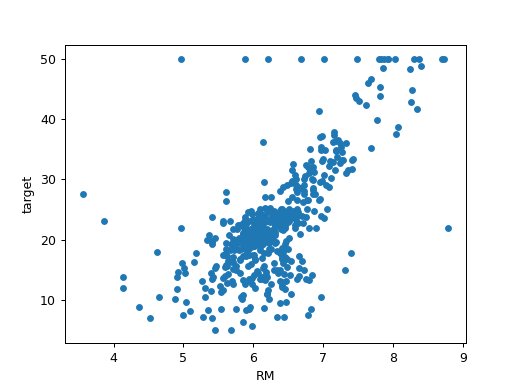

<AxesSubplot:xlabel='RM', ylabel='target'>

In [20]:
df.plot.scatter('RM', 'target')

<font color = green >

## Custom Linear Regression Classifier
</font>

<font color = green >

### Load all data 
</font>

In [22]:
X, y = load_boston(return_X_y=True)

# YOUR_CODE. select the values of feature 5 only (corresponding to 'RM') and assign to X 
# START_CODE 
X= X[:,5]
# END_CODE 

X= X.reshape(-1,1) # make it 2d as for case of mutivariable

# YOUR_CODE. Apply train_test_split to X and Y to get X_train, X_test, y_train, y_test
# START_CODE 
X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=0)
# END_CODE 


<font color = blue >

### Check loaded data

</font>

In [23]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:10]

X_train.shape=  (379, 1)
y_train.shape=  (379,)


array([[5.605],
       [5.927],
       [7.267],
       [6.471],
       [6.782],
       [5.983],
       [5.875],
       [6.824],
       [7.249],
       [6.086]])

<font color = blue>
Expected output:
</font>

<br>`X_train.shape=  (379, 1)`
<br>`y_train.shape=  (379,)`

<font color = green >

### Develop expresion of h

</font>

In [24]:
class Linear_Regression_1():
    def __init__(self):
        pass
            
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Assign expression for h to h_res 
        # START_CODE 
        h_res= b + w*X
        # END_CODE 
        
        return h_res

<font color = blue >

### Check h

</font>

In [25]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2018)
b_check= np.random.randn()
w_check= np.random.randn(1,1)
X_check= np.random.randn(10,1)
print('b= {}, \nw= {}, \nX= \n{}'.format(b_check, w_check, X_check))
lin_reg_1 = Linear_Regression_1()
lin_reg_1.h(b_check, w_check, X_check)

b= -0.276767596147759, 
w= [[0.581851]], 
X= 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]


array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       [ 0.22131391],
       [-0.35985014],
       [-0.21271821],
       [-0.67711878],
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])

<font color = blue>
Expected output:
</font>

<br>`array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       ...
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])`


<font color = green >

### Develop expresion of Cost Function

</font>

In [26]:
class Linear_Regression_2():
    '''linear regression using gradient descent
    '''
    def __init__(self):
        pass


    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')    
   
        # YOUR_CODE. Assign expression for J to J_res 
        # START_CODE 
        print(f"h = {np.array(h)}")
        print(f"y = {y}")
        J_res = 1/(2*m) * np.sum((h-y)**2)
        # END_CODE         
        return J_res           
 

<font color = blue >

### Check J

</font>

In [27]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2019)
m = 10 
y_check= np.random.randn(m,1)
h_check= np.random.randn(m,1)
#print('y= {}, \nh= {}'.format(y_check, h_check))
lin_reg_2 = Linear_Regression_2()
lin_reg_2.m = m 
lin_reg_2.J(h_check, y_check)

h = [[-1.6896253 ]
 [-0.34494271]
 [ 0.0169049 ]
 [-0.51498352]
 [ 0.24450929]
 [-0.18931261]
 [ 2.67217242]
 [ 0.46480249]
 [ 0.84593044]
 [-0.50354158]]
y = [[-0.21767896]
 [ 0.82145535]
 [ 1.48127781]
 [ 1.33186404]
 [-0.36186537]
 [ 0.68560883]
 [ 0.57376143]
 [ 0.28772767]
 [-0.23563426]
 [ 0.95349024]]


0.897146515186598

<font color = blue>
Expected output:
</font>

<br>`0.897146515186598`


<font color = green >

### Develop expresion of Cost Function  derivative 

</font>

In [28]:
class Linear_Regression_3():
    def __init__(self, max_iter = 1e5, alpha = 1,eps = 1e-10, verbose= 0):
        pass        

    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= b + w*X
        # END_CODE

        return h_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''    
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')

        # YOUR_CODE. Assign expressions for derivates of J by b and by w  to dJ_b and dJ_w corrrespondingly       
        # START_CODE   
        
        dJ_b= 1/m * np.sum(self.h(b,w,X)-y)
        dJ_w= 1/m * np.sum((self.h(b,w,X)-y) * X) 
        # END_CODE
        
        return (dJ_b, dJ_w)


<font color = blue >

### Check cost function derivatives 

</font>

In [29]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2020)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
b_check= np.random.randn()
w_check= np.random.randn(1,n)
params = b_check,w_check 
print('X= {}, \ny= {}, \nb= {} \nw= {}'.format(X_check, y_check, b_check, w_check))

lin_reg_3 = Linear_Regression_3()
lin_reg_3.m = m 
lin_reg_3.n = n 
lin_reg_3.J_derivative(params, X_check, y_check)

X= [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]], 
y= [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]], 
b= 2.0899788404287745 
w= [[0.04197131]]


(2.1904608819958713, -1.4328426209410612)

<font color = blue>
Expected output:
</font>

`(2.1904608819958713, -1.4328426209410612)`


<font color = green >

### Develop gradient descent 

</font>

In [30]:
class Linear_Regression_4():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= b + w*X
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        J_res= 1/(2*m) * np.sum((h-y)**2)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        dJ_b= 1/m * np.sum(self.h(b,w,X)-y)
        dJ_w= 1/m * np.sum((self.h(b,w,X)-y) * X) 
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Develop one step of gradien descent 
            # START_CODE 
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b= b - self.alpha * dJ_b
            w= w - self.alpha * dJ_w
            params= (b,w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
 

<font color = blue >

### Check gradient descent

</font>

In [31]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2021)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
print('X= {}, \ny= {}'.format(X_check, y_check))
lin_reg_4 = Linear_Regression_4(alpha = 1, max_iter = 5, verbose=1)
lin_reg_4.fit(X_check, y_check)

X= [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]], 
y= [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.18798089094052142, w= [[-0.58309057]], J= 0.3239391853771439


True

<font color = blue>
Expected output:
</font>

`Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.18798089094052142, w= [[-0.58309057]], J= 0.3239391853771439`


<font color = green >

### Ridge
</font>

In [44]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
regressor = ridge_reg
print ('Ridge')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Ridge
R2 train score = 0.9869193791074273
R2 test score = -73.01106262578176
b: [-109.7205784], 
w= [[33.44784341]]


<font color = green >

### Lasso
</font>

In [40]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)
regressor = lasso_reg
print ('Lasso')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Lasso
R2 train score = 0.46307514646649406
R2 test score = 0.46160054959299823
b: -23.016489396366907, 
w= [7.22754395]


<font color = green >

### Polynomial + Linear Regression
</font>

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)
# X_train_poly[:5]
poly_lin_reg = LinearRegression().fit (X_train_poly,y_train)
regressor = poly_lin_reg
print ('Polynomial + Linear Regression')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

X_train.shape=  (379, 1)
X_train_poly.shape=  (379, 2)
Polynomial + Linear Regression
R2 train score = 0.548340510908283
R2 test score = 0.5466668383242803
b: 68.3333925663359, 
w= [-23.54438749   2.55157123]
